In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from typing import List, Optional


In [ ]:
# Databricks notebook source
import networkx as nx
import matplotlib.pyplot as plt
#from matplotlib.pyplot import figure


# COMMAND ----------

import networkx as nx
import matplotlib.pyplot as plt
from typing import Optional
#from matplotlib.pyplot import figure

import numpy as np
import pandas as pd
from typing import Optional
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl


def plot(model, node_sizes, from_list: Optional[str] = None):
  font = 48
  plt.rc('font', size=font)
  plt.rc('axes', titlesize=font)
  plt.rc('axes', labelsize=font)
  plt.rc('legend', fontsize=font)
  plt.rc('figure', titlesize=font)
    
  if from_list is None:
    plt.figure(figsize=(8, 6), dpi=100)  

    nx.draw(model, with_labels=True, node_size = node_sizes)

    plt.axis('off')
    axis = plt.gca()
    axis.set_xlim([1.2*x for x in axis.get_xlim()])
    axis.set_ylim([1.2*y for y in axis.get_ylim()])
  else:
    plt.figure(figsize=(8, 6), dpi=100)  
  
    nx.draw(model, with_labels=True, node_size = node_sizes)

    plt.axis('off')
    axis = plt.gca()
    axis.set_xlim([1.2*x for x in axis.get_xlim()])
    axis.set_ylim([1.2*y for y in axis.get_ylim()])

  return plt.show()

# COMMAND ----------

from pgmpy.models import BayesianNetwork
plot(BayesianNetwork([('Kroutící moment', 'Porucha'), ('Porucha', 'Rychlost otáček'), ('Porucha', 'Opotřebení nástroje'), ('Porucha', 'Teplota vzduchu')]), 5000)

In [23]:
class PlotParams:

    def __init__(self, SMALL_SIZE, BIG_SIZE):
        self.SMALL_SIZE = SMALL_SIZE
        self.BIG_SIZE = BIG_SIZE
    
    @staticmethod
    def _config_text(SMALL_SIZE: Optional[int] = None, BIG_SIZE: Optional[int] = None):  
        plt.rc('font', size=SMALL_SIZE)
        plt.rc('axes', titlesize=SMALL_SIZE)
        plt.rc('axes', labelsize=SMALL_SIZE)
        plt.rc('legend', fontsize=SMALL_SIZE)
        plt.rc('figure', titlesize=BIG_SIZE)


class StackedPlot(PlotParams):
    def __init__(self, BIG_SIZE, SMALL_SIZE, chart_width: Optional[int] = None, chart_height: Optional[int] = None, loc: Optional[int] = None):

        self.chart_width = chart_width
        self.chart_height = chart_height
        self.loc = loc

        super().__init__(BIG_SIZE, SMALL_SIZE)

    def _stacked_bar_chart( 
                            self,
                            data, 
                            labels, 
                            category_name: str, 
                            inv_category_name: str,
                            title: str,
                            y_label: str,
                            save_path: Optional[str] = None    
                    ):

        self._config_text(SMALL_SIZE=self.SMALL_SIZE, BIG_SIZE=self.BIG_SIZE)

        data = [x * 100 for x in data]
        inverse_data = [(100 - x) for x in data]
        width = 0.5

        if (self.chart_width is not None) and (self.chart_height is not None):
            fig, ax = plt.subplots(figsize = (self.chart_width, self.chart_height))
        elif(self.chart_width is not None):
            fig, ax = plt.subplots(figsize = (self.chart_width, 4))
        else:
            fig, ax = plt.subplots(figsize = (14, 4))

        ax.bar(labels, data, width, label=category_name, color = 'b')
        ax.bar(labels, inverse_data, width, label=inv_category_name, bottom = data, color = 'darkorange' )
        ax.set_ylabel(y_label)
        ax.set_title(title)
        if self.loc is not None:
            ax.legend(loc=self.loc)
        else:
            ax.legend(loc=1)

        if save_path is not None:
            plt.savefig(save_path)

        plt.show()





StopIteration: 

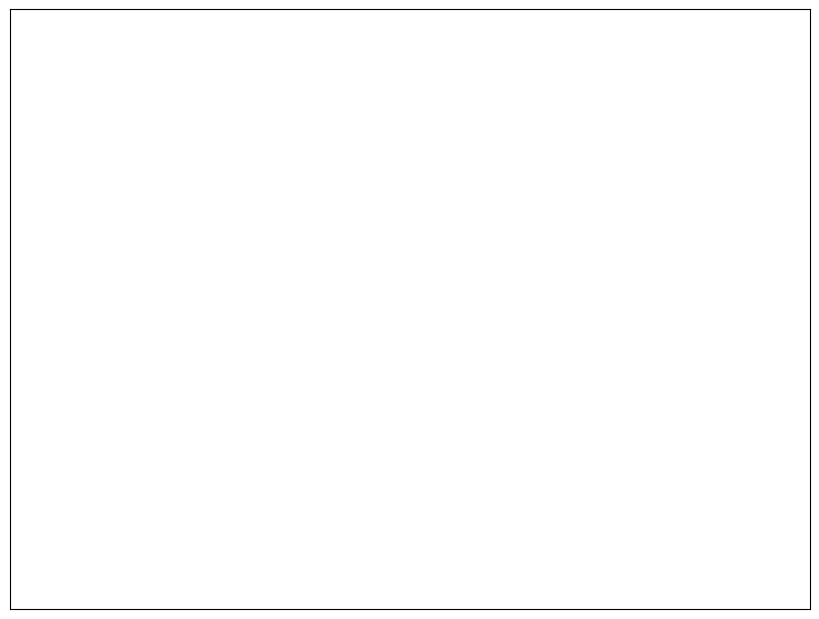

In [2]:
# Databricks notebook source
import networkx as nx
import matplotlib.pyplot as plt
#from matplotlib.pyplot import figure


# COMMAND ----------

import networkx as nx
import matplotlib.pyplot as plt
from typing import Optional
#from matplotlib.pyplot import figure

import numpy as np
import pandas as pd
from typing import Optional
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl


def plot(model, node_sizes, from_list: Optional[str] = None):
  font = 48
  plt.rc('font', size=font)
  plt.rc('axes', titlesize=font)
  plt.rc('axes', labelsize=font)
  plt.rc('legend', fontsize=font)
  plt.rc('figure', titlesize=font)
    
  if from_list is None:
    plt.figure(figsize=(8, 6), dpi=100)  

    nx.draw(model, with_labels=True, node_size = node_sizes)

    plt.axis('off')
    axis = plt.gca()
    axis.set_xlim([1.2*x for x in axis.get_xlim()])
    axis.set_ylim([1.2*y for y in axis.get_ylim()])
  else:
    plt.figure(figsize=(8, 6), dpi=100)  
  
    nx.draw(model, with_labels=True, node_size = node_sizes)

    plt.axis('off')
    axis = plt.gca()
    axis.set_xlim([1.2*x for x in axis.get_xlim()])
    axis.set_ylim([1.2*y for y in axis.get_ylim()])

  return plt.show()

# COMMAND ----------

from pgmpy.models import BayesianNetwork
plot(BayesianNetwork([('Kroutící moment', 'Porucha'), ('Porucha', 'Rychlost otáček'), ('Porucha', 'Opotřebení nástroje'), ('Porucha', 'Teplota vzduchu')]), 5000)


## Classes and methods

In [24]:

class ParseString:
    def __init__(self, base_path):
        self.base_path = base_path
    
    def _split_nums(self, file_name):
        
        with open(f'{self.base_path}/{file_name}.txt', 'r') as file:
            string = file.read()

        return list(string.split("|"))
    
    @staticmethod
    def _return_float(l_slice, r_slice, num, lst = []):
        if l_slice is None and r_slice is None:
            return float(num[0:5])
        else:   
            return float(num[l_slice:r_slice])

    @staticmethod
    def _return_string(l_slice, r_slice, num, lst = []):
        if l_slice is None and r_slice is None:
            return num[0:5]
        else:   
            return num[l_slice:r_slice]


    def _select_string_subset(
                            self, 
                            file_name: str,
                            type: type,
                            l_slice: Optional[int] = None, 
                            r_slice: Optional[int] = None, 
                            parsed_lst = []
                        ):
        if parsed_lst is not None:
            parsed_lst = []
            for num in self._split_nums(file_name):
                if type == "float":
                    parsed_lst.append(self._return_float(l_slice, r_slice, num))
                else:
                    parsed_lst.append(self._return_string(l_slice, r_slice, num))
        else:
            for num in self._split_nums(file_name):
                if type == "float":
                    parsed_lst.append(self._return_float(l_slice, r_slice, num))
                else:
                    parsed_lst.append(self._return_string(l_slice, r_slice, num))


        return parsed_lst

    def parse_string_numeric(
                    self, 
                    file_name: str,
                    l_slice: Optional[int] = None, 
                    r_slice: Optional[int] = None, 
                    lst = []
                ) -> List[float]: 
        lst = []
        for i in self._select_string_subset(file_name, type = "float", r_slice=r_slice, l_slice=l_slice):
            try:
                val = float(i)
                lst.append(val)
                #print(f"val: {val}  and its type: {type(val)}")
            except ValueError:
                raise ValueError("Chyba v numericke hodnote ci konverze na ni.")

        return lst

    def parse_string_string(
                    self, 
                    file_name: str, 
                    type: Optional[str] = "string",
                    l_slice: Optional[int] = None, 
                    r_slice: Optional[int] = None, 
                    lst = []
                ) -> List[float]: 
            
        lst = []

        for i in self._select_string_subset(file_name, type):
            try:
                if i[0] == ' ':
                    val = i[1:]
                    lst.append(val)
                else:
                    val = i[:-1]
                    lst.append(val)
            except ValueError:
                pass

        return lst

    @staticmethod
    def _preprocess_header(header_1):
        counter  = 0
        lst = []
        for i in header_1:

            if i[-1] != ")":
                i += ")"
            else:
                pass

            lst.append(i)

        return lst


## Init data

In [25]:
BASE_PATH = "./data/param_vals"

str_parser = ParseString(base_path = BASE_PATH)


hc_val_bayes = str_parser.parse_string_numeric(file_name = "hc_val_bayes", l_slice = 0, r_slice = 9)
hc_val_em = str_parser.parse_string_numeric(file_name = "hc_val_em", l_slice = 0, r_slice = 9)
sem_hc_em = str_parser.parse_string_numeric(file_name = "sem_hc_em", l_slice = 0, r_slice = 9)
sem_hc_bayes = str_parser.parse_string_numeric(file_name = "sem_hc_bayes", l_slice = 0, r_slice = 9)

pearson_val_bayes = str_parser.parse_string_numeric(file_name = "pearson_val_bayes", l_slice = 0, r_slice = 9)
pearson_val_em = str_parser.parse_string_numeric(file_name = "pearson_val_em", l_slice = 0, r_slice = 9)
sem_pearson_em = str_parser.parse_string_numeric(file_name = "sem_pearson_em", l_slice = 0, r_slice = 9)
sem_pearson_bayes = str_parser.parse_string_numeric(file_name = "sem_pearson_bayes", l_slice = 0, r_slice = 9)


hc_header = str_parser.parse_string_string(file_name = "hc_header", l_slice = 0, r_slice = 5)
hc_header = str_parser._preprocess_header(hc_header)

pearson_header = str_parser.parse_string_string(file_name = "pearson_header", l_slice = 0, r_slice = 5)
pearson_header = str_parser._preprocess_header(pearson_header)



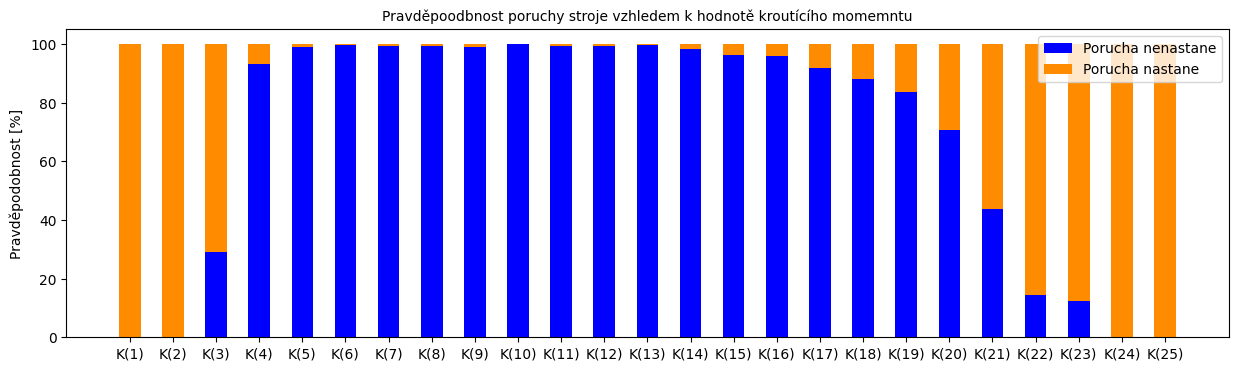

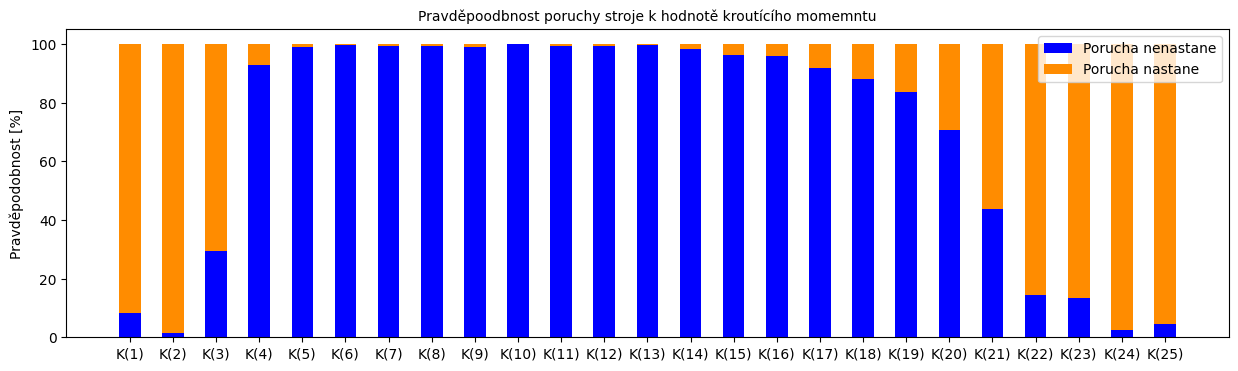

In [26]:
bar_plotter = StackedPlot(10, 10, 15, 4)
LEGEND_2 = 'Porucha nastane'
LEGEND_1 = 'Porucha nenastane'
OFFSET = 25
counter = 0

for i in np.arange(0, OFFSET*1, OFFSET): 
    counter += 1
    
    bar_plotter._stacked_bar_chart(
                        hc_val_em[i:i+OFFSET], 
                        hc_header[i:i+OFFSET], 
                        LEGEND_1, 
                        LEGEND_2,
                        f'Pravděpoodbnost poruchy stroje vzhledem k hodnotě kroutícího momemntu', 
                        'Pravděpodobnost [%]',
                        './img/prob/hc_em.png'
                )
    bar_plotter._stacked_bar_chart(
                        hc_val_bayes[i:i+OFFSET], 
                        hc_header[i:i+OFFSET], 
                        LEGEND_1, 
                        LEGEND_2,
                        f'Pravděpoodbnost poruchy stroje k hodnotě kroutícího momemntu', 
                        'Pravděpodobnost [%]',
                        './img/prob/hc_bayes.png'
                )


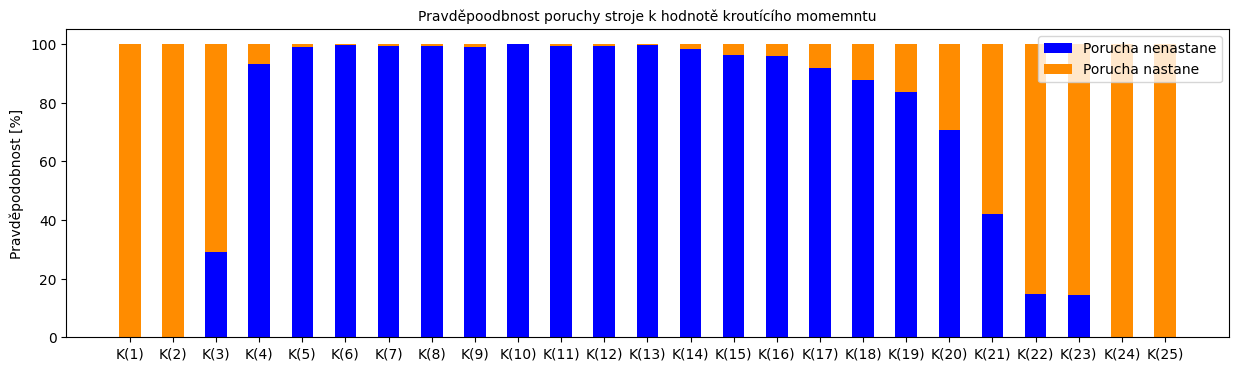

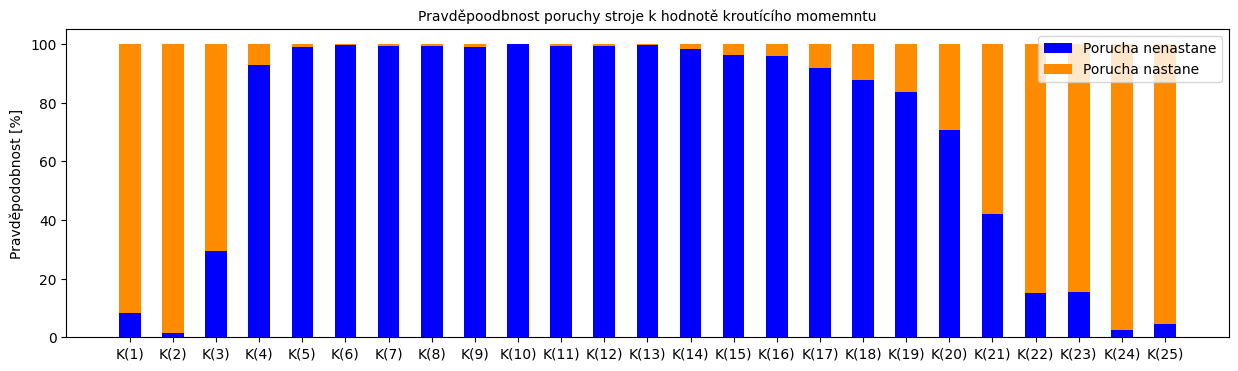

In [27]:

OFFSET = 25
counter = 0
for i in np.arange(0, OFFSET*1, OFFSET): 
    counter += 1
    
    bar_plotter._stacked_bar_chart(
                        sem_hc_em[i:i+OFFSET], 
                        hc_header[i:i+OFFSET], 
                        LEGEND_1, 
                        LEGEND_2,
                        f'Pravděpoodbnost poruchy stroje k hodnotě kroutícího momemntu', 
                        'Pravděpodobnost [%]',
                        './img/prob/sem_hc_em.png'
                )
    bar_plotter._stacked_bar_chart(
                        sem_hc_bayes[i:i+OFFSET], 
                        hc_header[i:i+OFFSET], 
                        LEGEND_1, 
                        LEGEND_2,
                        f'Pravděpoodbnost poruchy stroje k hodnotě kroutícího momemntu', 
                        'Pravděpodobnost [%]',
                        './img/prob/sem_hc_bayes.png'
                )


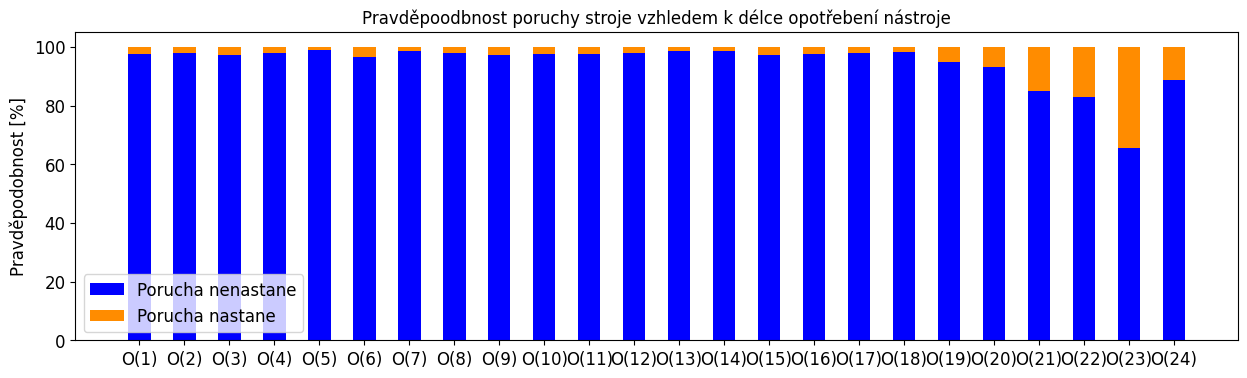

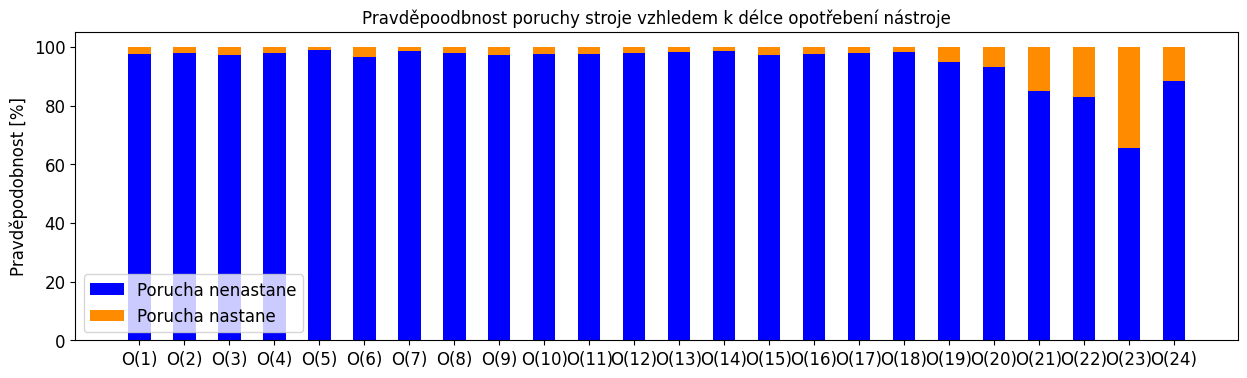

In [28]:
bar_plotter = StackedPlot(12, 10, 15, 4, 3)


OFFSET = 25
counter = 0
for i in np.arange(0, OFFSET*1, OFFSET): 
    counter += 1
    
    bar_plotter._stacked_bar_chart(
                        pearson_val_em[i:i+OFFSET], 
                        pearson_header[i:i+OFFSET], 
                        LEGEND_1, 
                        LEGEND_2, 
                        f'Pravděpoodbnost poruchy stroje vzhledem k délce opotřebení nástroje', 
                        'Pravděpodobnost [%]',
                        './img/prob/pearson_em.png'
                )
    bar_plotter._stacked_bar_chart(
                        pearson_val_bayes[i:i+OFFSET], 
                        pearson_header[i:i+OFFSET], 
                        LEGEND_1, 
                        LEGEND_2,
                        f'Pravděpoodbnost poruchy stroje vzhledem k délce opotřebení nástroje', 
                        'Pravděpodobnost [%]',
                        './img/prob/pearson_bayes.png'    
                    )


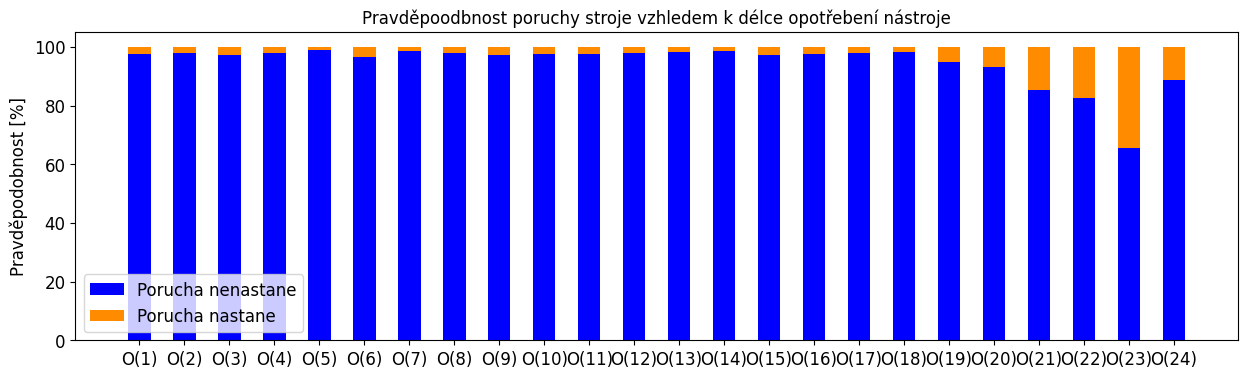

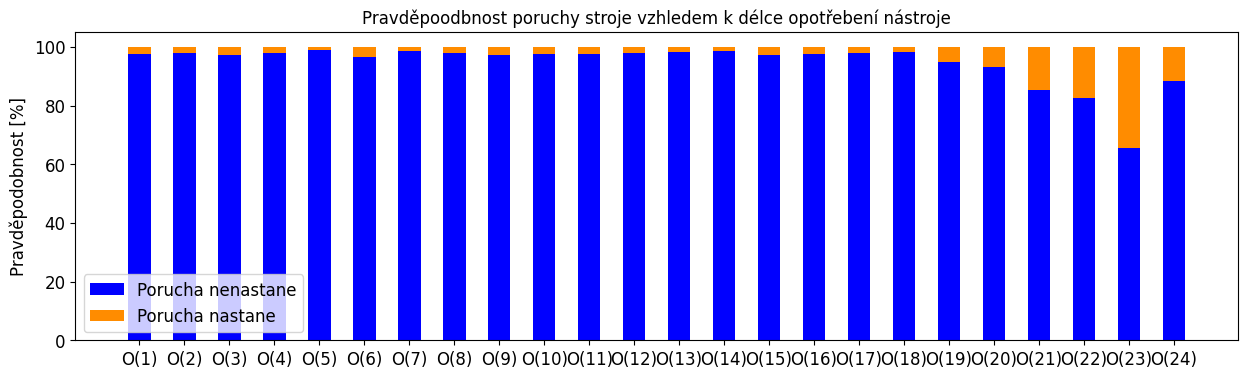

In [29]:

OFFSET = 25
counter = 0
for i in np.arange(0, OFFSET*1, OFFSET): 
    counter += 1
    
    bar_plotter._stacked_bar_chart(
                        sem_pearson_em[i:i+OFFSET], 
                        pearson_header[i:i+OFFSET], 
                        LEGEND_1, 
                        LEGEND_2,
                        f'Pravděpoodbnost poruchy stroje vzhledem k délce opotřebení nástroje', 
                        'Pravděpodobnost [%]',
                        './img/prob/sem_pearson_em.png'
                )
    bar_plotter._stacked_bar_chart(
                        sem_pearson_bayes[i:i+OFFSET], 
                        pearson_header[i:i+OFFSET], 
                        LEGEND_1, 
                        LEGEND_2,
                        f'Pravděpoodbnost poruchy stroje vzhledem k délce opotřebení nástroje', 
                        'Pravděpodobnost [%]',
                        './img/prob/sem_pearson_bayes.png'
                )


In [30]:
import pandas as pd

df = pd.read_csv("./data/binned_data/pearson.csv")

print("T: \n")
print(df['T'].unique())
print("-------------------------\n")
print('R: \n')
print(df['R'].unique())
print("-------------------------\n")
print("K: \n")
print(df['K'].unique())
print("-------------------------\n")
print("O: \n")
print(df['O'].unique())

pd.DataFrame(df['T'].unique()).to_csv("hc_t.csv")
pd.DataFrame(df['R'].unique()).to_csv("hc_r.csv")
pd.DataFrame(df['O'].unique()).to_csv("hc_o.csv")
pd.DataFrame(df['K'].unique()).to_csv("hc_k.csv")


T: 

['(300.735, 301.152]' '(303.239, 303.657]' '(298.23, 298.648]'
 '(301.987, 302.404]' '(300.317, 300.735]' '(297.396, 297.813]'
 '(303.657, 304.074]' '(299.9, 300.317]' '(299.483, 299.9]'
 '(298.648, 299.065]' '(299.065, 299.483]' '(302.822, 303.239]'
 '(301.57, 301.987]' '(302.404, 302.822]' '(297.813, 298.23]'
 '(296.978, 297.396]' '(301.152, 301.57]' '(295.726, 296.143]'
 '(295.309, 295.726]' '(296.561, 296.978]' '(296.143, 296.561]'
 '(304.074, 304.491]' '(294.891, 295.309]' '(304.491, 304.909]']
-------------------------

R: 

['(1501.087, 1538.652]' '(1388.391, 1425.957]' '(1463.522, 1501.087]'
 '(1576.217, 1613.783]' '(1839.174, 1876.739]' '(1425.957, 1463.522]'
 '(1313.261, 1350.826]' '(1613.783, 1651.348]' '(1688.913, 1726.478]'
 '(1538.652, 1576.217]' '(1350.826, 1388.391]' '(1726.478, 1764.043]'
 '(1275.696, 1313.261]' '(1651.348, 1688.913]' '(1801.609, 1839.174]'
 '(2214.826, 2252.391]' '(1764.043, 1801.609]' '(1876.739, 1914.304]'
 '(1238.13, 1275.696]' '(1914.304, 195

In [31]:
import pandas as pd

df = pd.read_csv("./data/binned_data/hc.csv")

print("T: \n")
print(df['T'].unique())
print("-------------------------\n")
print('R: \n')
print(df['R'].unique())
print("-------------------------\n")
print("K: \n")
print(df['K'].unique())
print("-------------------------\n")
print("O: \n")
print(df['O'].unique())


pd.DataFrame(df['T'].unique()).to_csv("p_t.csv")
pd.DataFrame(df['R'].unique()).to_csv("p_r.csv")
pd.DataFrame(df['O'].unique()).to_csv("p_o.csv")
pd.DataFrame(df['K'].unique()).to_csv("p_k.csv")


T: 

['(300.586, 301.271]' '(303.329, 304.014]' '(297.843, 298.529]'
 '(302.643, 303.329]' '(301.957, 302.643]' '(299.9, 300.586]'
 '(297.157, 297.843]' '(299.214, 299.9]' '(298.529, 299.214]'
 '(301.271, 301.957]' '(296.471, 297.157]' '(295.786, 296.471]'
 '(295.1, 295.786]' '(304.014, 304.7]']
-------------------------

R: 

['(1533.286, 1595.0]' '(1409.857, 1471.571]' '(1471.571, 1533.286]'
 '(1841.857, 1903.571]' '(1348.143, 1409.857]' '(1286.429, 1348.143]'
 '(1595.0, 1656.714]' '(1656.714, 1718.429]' '(1718.429, 1780.143]'
 '(1780.143, 1841.857]' '(2212.143, 2273.857]' '(1224.714, 1286.429]'
 '(1903.571, 1965.286]' '(2520.714, 2582.429]' '(2027.0, 2088.714]'
 '(1965.286, 2027.0]' '(2335.571, 2397.286]' '(2644.143, 2705.857]'
 '(2150.429, 2212.143]' '(2459.0, 2520.714]' '(2088.714, 2150.429]'
 '(1163.0, 1224.714]' '(2705.857, 2767.571]' '(2582.429, 2644.143]'
 '(2273.857, 2335.571]' '(2397.286, 2459.0]' '(2767.571, 2829.286]']
-------------------------

K: 

['(34.286, 37.243]' '(

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
class PlotParams:
    from typing import Optional

    def __init__(self, SMALL_SIZE, BIG_SIZE):
        self.SMALL_SIZE = SMALL_SIZE
        self.BIG_SIZE = BIG_SIZE
    
    @staticmethod
    def _config_text(SMALL_SIZE: Optional[int] = None, BIG_SIZE: Optional[int] = None):  
        plt.rc('font', size=SMALL_SIZE)
        plt.rc('axes', titlesize=SMALL_SIZE)
        plt.rc('axes', labelsize=SMALL_SIZE)
        plt.rc('legend', fontsize=SMALL_SIZE)
        plt.rc('figure', titlesize=BIG_SIZE)


class StackedPlot(PlotParams):
    def __init__(self, BIG_SIZE, SMALL_SIZE, chart_width: Optional[int] = None, chart_height: Optional[int] = None, loc: Optional[int] = None):

        self.chart_width = chart_width
        self.chart_height = chart_height
        self.loc = loc

        super().__init__(BIG_SIZE, SMALL_SIZE)

    def _stacked_bar_chart( 
                            self,
                            data, 
                            labels, 
                            category_name: str, 
                            inv_category_name: str,
                            title: str,
                            y_label: str,
                            save_path: Optional[str] = None    
                    ):

        self._config_text(SMALL_SIZE=self.SMALL_SIZE, BIG_SIZE=self.BIG_SIZE)

        data = [x * 100 for x in data]
        inverse_data = [(100 - x) for x in data]
        width = 0.5

        if (self.chart_width is not None) and (self.chart_height is not None):
            fig, ax = plt.subplots(figsize = (self.chart_width, self.chart_height))
        elif(self.chart_width is not None):
            fig, ax = plt.subplots(figsize = (self.chart_width, 4))
        else:
            fig, ax = plt.subplots(figsize = (14, 4))

        ax.bar(labels, data, width, label=category_name, color = 'b')
        ax.bar(labels, inverse_data, width, label=inv_category_name, bottom = data, color = 'darkorange' )
        ax.set_ylabel(y_label)
        ax.set_title(title)
        if self.loc is not None:
            ax.legend(loc=self.loc)
        else:
            ax.legend(loc=1)

        if save_path is not None:
            plt.savefig(save_path)

        plt.show()






## Classes and methods

In [34]:
from typing import List, Optional

class ParseString:
    def __init__(self, base_path):
        self.base_path = base_path
    
    def _split_nums(self, file_name):
        
        with open(f'{self.base_path}/{file_name}.txt', 'r') as file:
            string = file.read()

        return list(string.split("|"))
    
    @staticmethod
    def _return_float(l_slice, r_slice, num, lst = []):
        if l_slice is None and r_slice is None:
            return float(num[0:5])
        else:   
            return float(num[l_slice:r_slice])

    @staticmethod
    def _return_string(l_slice, r_slice, num, lst = []):
        if l_slice is None and r_slice is None:
            return num[0:5]
        else:   
            return num[l_slice:r_slice]


    def _select_string_subset(
                            self, 
                            file_name: str,
                            type: type,
                            l_slice: Optional[int] = None, 
                            r_slice: Optional[int] = None, 
                            parsed_lst = []
                        ):
        if parsed_lst is not None:
            parsed_lst = []
            for num in self._split_nums(file_name):
                if type == "float":
                    parsed_lst.append(self._return_float(l_slice, r_slice, num))
                else:
                    parsed_lst.append(self._return_string(l_slice, r_slice, num))
        else:
            for num in self._split_nums(file_name):
                if type == "float":
                    parsed_lst.append(self._return_float(l_slice, r_slice, num))
                else:
                    parsed_lst.append(self._return_string(l_slice, r_slice, num))


        return parsed_lst

    def parse_string_numeric(
                    self, 
                    file_name: str,
                    l_slice: Optional[int] = None, 
                    r_slice: Optional[int] = None, 
                    lst = []
                ) -> List[float]: 
        lst = []
        for i in self._select_string_subset(file_name, type = "float", r_slice=r_slice, l_slice=l_slice):
            try:
                val = float(i)
                lst.append(val)
                #print(f"val: {val}  and its type: {type(val)}")
            except ValueError:
                raise ValueError("Chyba v numericke hodnote ci konverze na ni.")

        return lst

    def parse_string_string(
                    self, 
                    file_name: str, 
                    type: Optional[str] = "string",
                    l_slice: Optional[int] = None, 
                    r_slice: Optional[int] = None, 
                    lst = []
                ) -> List[float]: 
            
        lst = []

        for i in self._select_string_subset(file_name, type):
            try:
                if i[0] == ' ':
                    val = i[1:]
                    lst.append(val)
                else:
                    val = i[:-1]
                    lst.append(val)
            except ValueError:
                pass

        return lst

    @staticmethod
    def _preprocess_header(header_1):
        counter  = 0
        lst = []
        for i in header_1:

            if i[-1] != ")":
                i += ")"
            else:
                pass

            lst.append(i)

        return lst


## Init data

In [35]:
BASE_PATH = "./data/param_vals"

str_parser = ParseString(base_path = BASE_PATH)


hc_val_bayes = str_parser.parse_string_numeric(file_name = "hc_val_bayes", l_slice = 0, r_slice = 9)
hc_val_em = str_parser.parse_string_numeric(file_name = "hc_val_em", l_slice = 0, r_slice = 9)
sem_hc_em = str_parser.parse_string_numeric(file_name = "sem_hc_em", l_slice = 0, r_slice = 9)
sem_hc_bayes = str_parser.parse_string_numeric(file_name = "sem_hc_bayes", l_slice = 0, r_slice = 9)

pearson_val_bayes = str_parser.parse_string_numeric(file_name = "pearson_val_bayes", l_slice = 0, r_slice = 9)
pearson_val_em = str_parser.parse_string_numeric(file_name = "pearson_val_em", l_slice = 0, r_slice = 9)
sem_pearson_em = str_parser.parse_string_numeric(file_name = "sem_pearson_em", l_slice = 0, r_slice = 9)
sem_pearson_bayes = str_parser.parse_string_numeric(file_name = "sem_pearson_bayes", l_slice = 0, r_slice = 9)


hc_header = str_parser.parse_string_string(file_name = "hc_header", l_slice = 0, r_slice = 5)
hc_header = str_parser._preprocess_header(hc_header)

pearson_header = str_parser.parse_string_string(file_name = "pearson_header", l_slice = 0, r_slice = 5)
pearson_header = str_parser._preprocess_header(pearson_header)



In [36]:
len(hc_header)

25

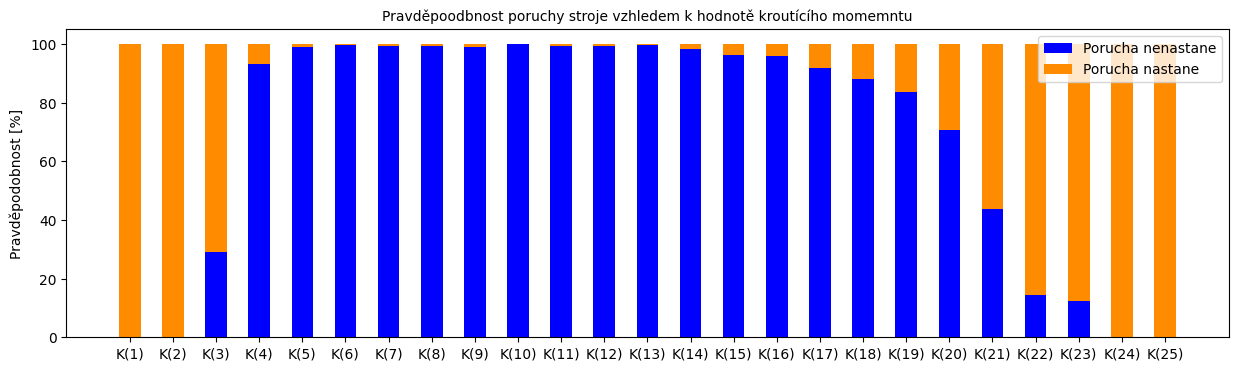

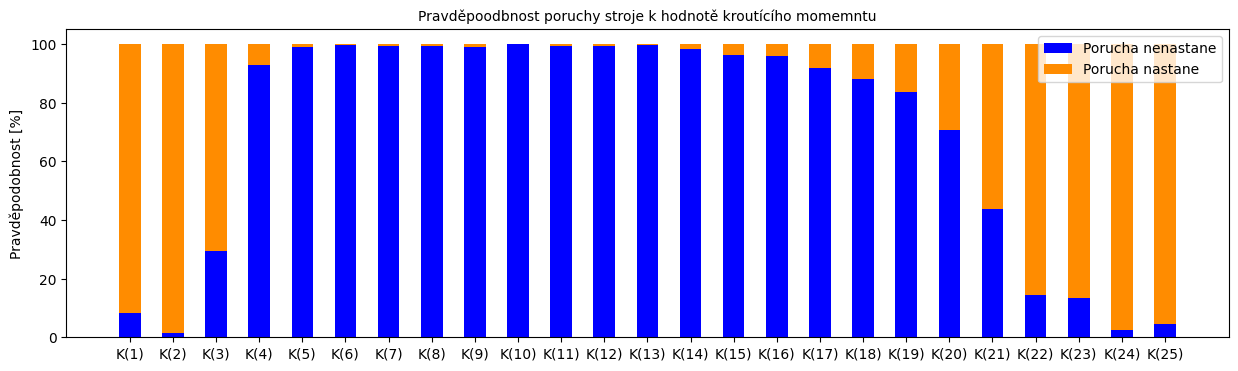

In [37]:
bar_plotter = StackedPlot(10, 10, 15, 4)
LEGEND_2 = 'Porucha nastane'
LEGEND_1 = 'Porucha nenastane'
OFFSET = 25
counter = 0

for i in np.arange(0, OFFSET*1, OFFSET): 
    counter += 1
    
    bar_plotter._stacked_bar_chart(
                        hc_val_em[i:i+OFFSET], 
                        hc_header[i:i+OFFSET], 
                        LEGEND_1, 
                        LEGEND_2,
                        f'Pravděpoodbnost poruchy stroje vzhledem k hodnotě kroutícího momemntu', 
                        'Pravděpodobnost [%]',
                        './img/prob/hc_em.png'
                )
    bar_plotter._stacked_bar_chart(
                        hc_val_bayes[i:i+OFFSET], 
                        hc_header[i:i+OFFSET], 
                        LEGEND_1, 
                        LEGEND_2,
                        f'Pravděpoodbnost poruchy stroje k hodnotě kroutícího momemntu', 
                        'Pravděpodobnost [%]',
                        './img/prob/hc_bayes.png'
                )


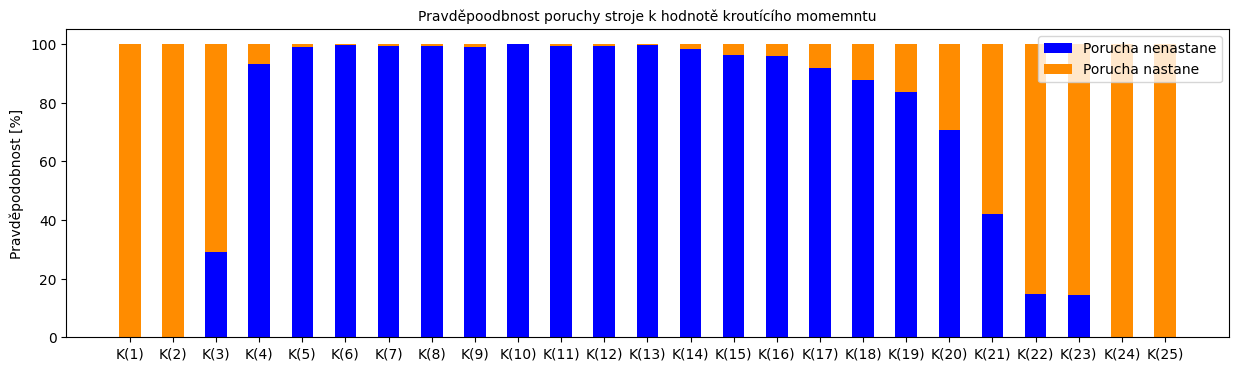

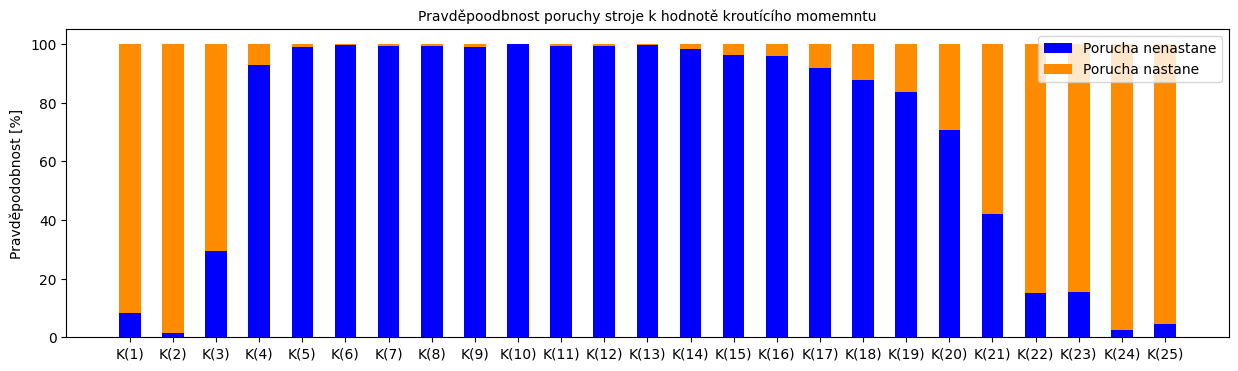

In [38]:

OFFSET = 25
counter = 0
for i in np.arange(0, OFFSET*1, OFFSET): 
    counter += 1
    
    bar_plotter._stacked_bar_chart(
                        sem_hc_em[i:i+OFFSET], 
                        hc_header[i:i+OFFSET], 
                        LEGEND_1, 
                        LEGEND_2,
                        f'Pravděpoodbnost poruchy stroje k hodnotě kroutícího momemntu', 
                        'Pravděpodobnost [%]',
                        './img/prob/sem_hc_em.png'
                )
    bar_plotter._stacked_bar_chart(
                        sem_hc_bayes[i:i+OFFSET], 
                        hc_header[i:i+OFFSET], 
                        LEGEND_1, 
                        LEGEND_2,
                        f'Pravděpoodbnost poruchy stroje k hodnotě kroutícího momemntu', 
                        'Pravděpodobnost [%]',
                        './img/prob/sem_hc_bayes.png'
                )


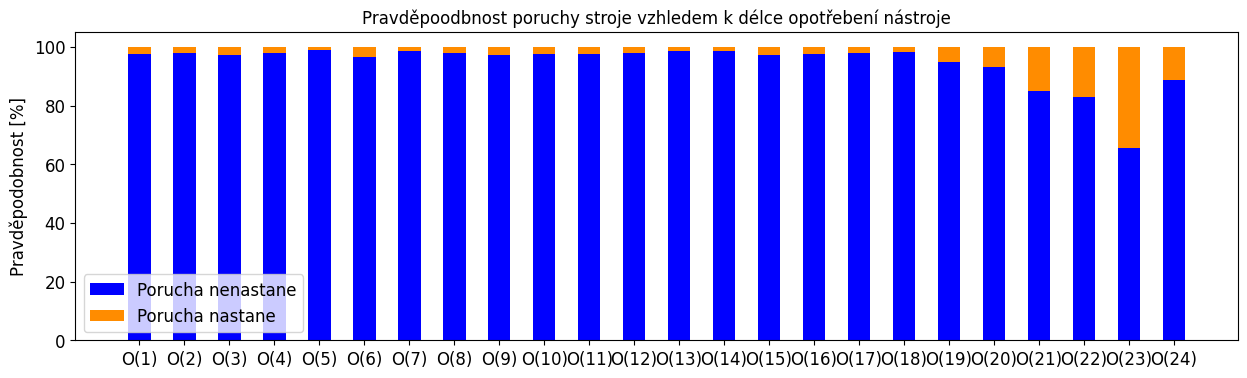

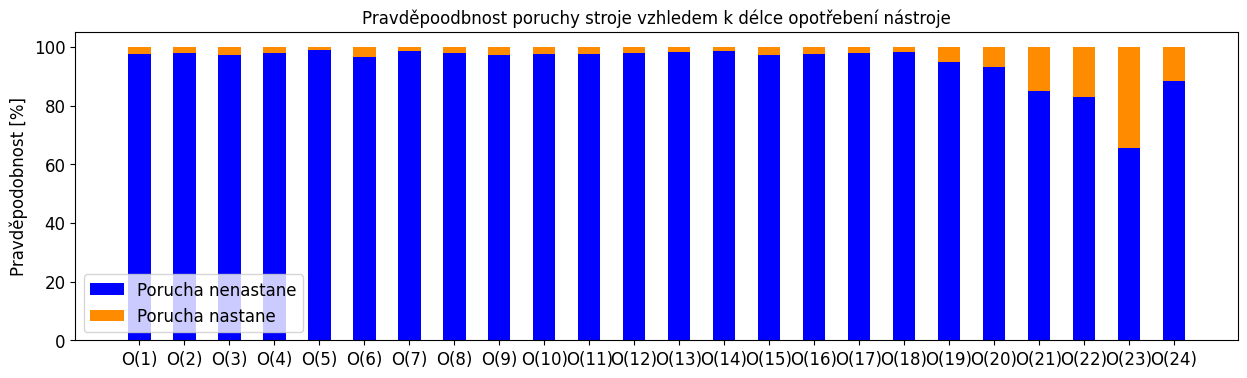

In [39]:
bar_plotter = StackedPlot(12, 10, 15, 4, 3)


OFFSET = 25
counter = 0
for i in np.arange(0, OFFSET*1, OFFSET): 
    counter += 1
    
    bar_plotter._stacked_bar_chart(
                        pearson_val_em[i:i+OFFSET], 
                        pearson_header[i:i+OFFSET], 
                        LEGEND_1, 
                        LEGEND_2, 
                        f'Pravděpoodbnost poruchy stroje vzhledem k délce opotřebení nástroje', 
                        'Pravděpodobnost [%]',
                        './img/prob/pearson_em.png'
                )
    bar_plotter._stacked_bar_chart(
                        pearson_val_bayes[i:i+OFFSET], 
                        pearson_header[i:i+OFFSET], 
                        LEGEND_1, 
                        LEGEND_2,
                        f'Pravděpoodbnost poruchy stroje vzhledem k délce opotřebení nástroje', 
                        'Pravděpodobnost [%]',
                        './img/prob/pearson_bayes.png'    
                    )


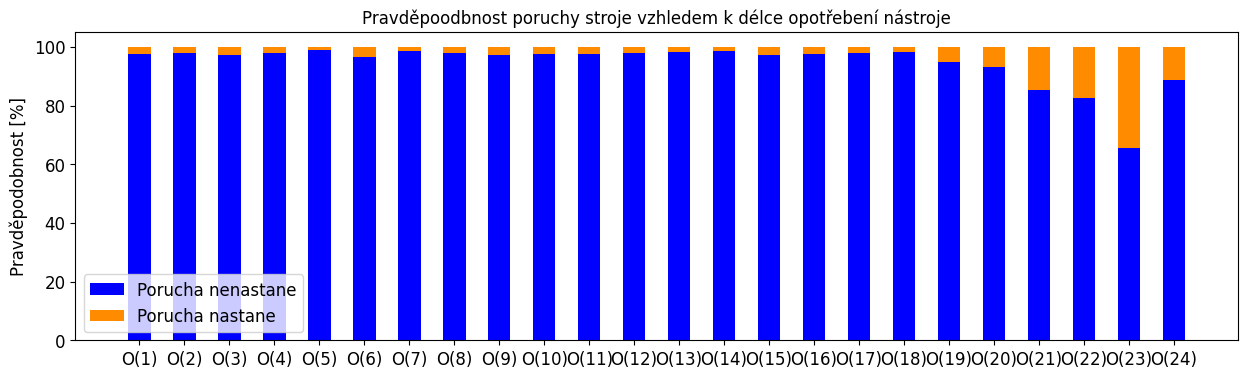

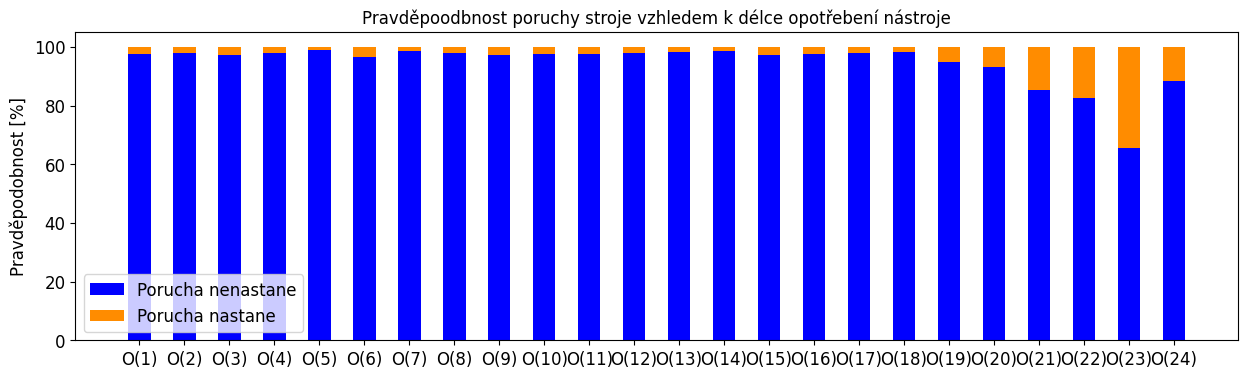

In [40]:
bar_plotter = StackedPlot(12, 10, 15, 4, 3)
OFFSET = 25
counter = 0
for i in np.arange(0, OFFSET*1, OFFSET): 
    counter += 1
    
    bar_plotter._stacked_bar_chart(
                        sem_pearson_em[i:i+OFFSET], 
                        pearson_header[i:i+OFFSET], 
                        LEGEND_1, 
                        LEGEND_2,
                        f'Pravděpoodbnost poruchy stroje vzhledem k délce opotřebení nástroje', 
                        'Pravděpodobnost [%]',
                        './img/prob/sem_pearson_em.png'
                )
    bar_plotter._stacked_bar_chart(
                        sem_pearson_bayes[i:i+OFFSET], 
                        pearson_header[i:i+OFFSET], 
                        LEGEND_1, 
                        LEGEND_2,
                        f'Pravděpoodbnost poruchy stroje vzhledem k délce opotřebení nástroje', 
                        'Pravděpodobnost [%]',
                        './img/prob/sem_pearson_bayes.png'
                )


In [41]:
def create_interval(df, *cols):
    for col in cols:
            lst = []
            for i in df[col]:
                
                if type(i) != float:
                    i = i[:-1]
                    i += ">"
                    i = i.replace(",", ";")
                    lst.append(i)
                else:
                    lst.append(i)
            print(len(lst))
            df[col] = lst
    
    return df

import pandas as pd

df = pd.read_csv("unique_data.csv")
df = create_interval(df, "hc_k", "hc_o")

df

KeyError: 'hc_k'

In [ ]:
df = df['hc_k']
df['hc_o'] = rangebins = pd.cut(np.array([0,254.52]),25)


df.to_csv("unique_data.csv")

In [ ]:

def create_interval(df, *cols):
    for col in cols:
            lst = []
            for i in df[col]:
                i = str(i)
                
                if type(i) != float:
                    i = i[:-1]
                    i += ">"
                    i = i.replace(",", ";")
                    lst.append(i)
                else:
                    lst.append(i)
            print(len(lst))
            df[col] = lst
    
    return df

a = pd.read_csv("./data/predictive_maintenance.csv")

df = pd.DataFrame(pd.cut(a['Opotřebení nástroje'], 25).unique())

df = df.sort_values(by = 0)



df = create_interval(df, 0)
df.to_csv("./data.csv")